In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("../data/CompleteListFixed.csv")

# Display general information about the DataFrame
print(df.info())

# Check for NaN values in each column
print(df.isnull().sum())

# Display the first few rows of the DataFrame
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90214 entries, 0 to 90213
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    90214 non-null  int64  
 1   Municipality  90213 non-null  object 
 2   Country       90214 non-null  object 
 3   E-Mail        59722 non-null  object 
 4   Website       57062 non-null  object 
 5   Population    50422 non-null  object 
 6   pop_d         5391 non-null   float64
 7   status        90214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.5+ MB
None
Unnamed: 0          0
Municipality        1
Country             0
E-Mail          30492
Website         33152
Population      39792
pop_d           84823
status              0
dtype: int64


/tmp/ipykernel_55420/1599591724.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/CompleteListFixed.csv")


,Unnamed: 0,Municipality,Country,E-Mail,Website,Population,pop_d,status
0,70188,Citta' Umilissima,Malta,NaN,http://www.cityofvalletta.org/,5859.0,NaN,no email found
1,70189,Citta' Vittoriosa,Malta,NaN,http://birgu.gov.mt/,2455.0,NaN,invalid url
2,70190,Citta' Invicta,Malta,NaN,http://www.islalocalcouncil.com/,2732.0,NaN,no email found
3,70191,Citta' Cospicua,Malta,NaN,NaN,5142.0,NaN,no website found
4,70192,Citta' Hompesch,Malta,NaN,http://www.zabbar.gov.mt/,15648.0,NaN,invalid url


{'no email found': 15367, 'invalid url': 2304, 'no website found': 9534, 'no wikipedia page found': 4690, 'no error': 11109, 'email added from teams version': 1561, 'url added from teams version': 2087, 'email already existing': 199, 'no status available': 44282, 'no connection to page': 1, 'information provided by country administration': 2927}


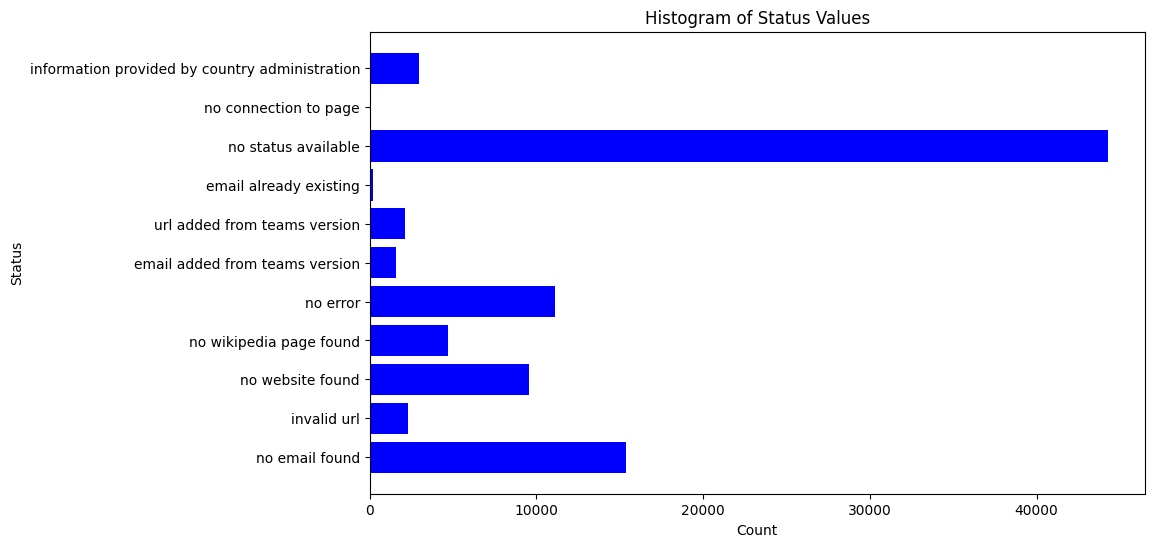

In [11]:
# Rename columns
df.columns = ['index', 'municipality', 'country', 'email', 'website', 'population', 'pop_d', 'status']

# Get the status values considering multiple values separated by a comma
status_values = {}
for status in df['status']:
    if pd.isnull(status):
        continue
    for value in status.split(','):
        value = value.strip()
        if value not in status_values:
            status_values[value] = 0
        status_values[value] += 1

print(status_values)

labels = list(status_values.keys())
values = list(status_values.values())
plt.figure(figsize=(10,6))
plt.barh(labels, values, color='blue')
plt.xlabel('Count')
plt.ylabel('Status')
plt.title('Histogram of Status Values')
plt.show()